# SentimentAnalysis
## Random Forest
### [ Opiniones VS Polaridad ]
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.


### Importar Librerias

Primero importemos las librerias necesarias para este trabajo.

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from IPython.display import Image

### Leer un archivo CSV.

El archivo original es de extencion **xlsx** pero puede exportarse con Microsoft Excel a CSV delimitado por comas.

La exportacion delimitada por comas realmente separa las columnas por ";" por lo que por seguridad de la integridad d elos datos, se reemplaza cada ";" y "," por un "" para evitar problemas en la data.

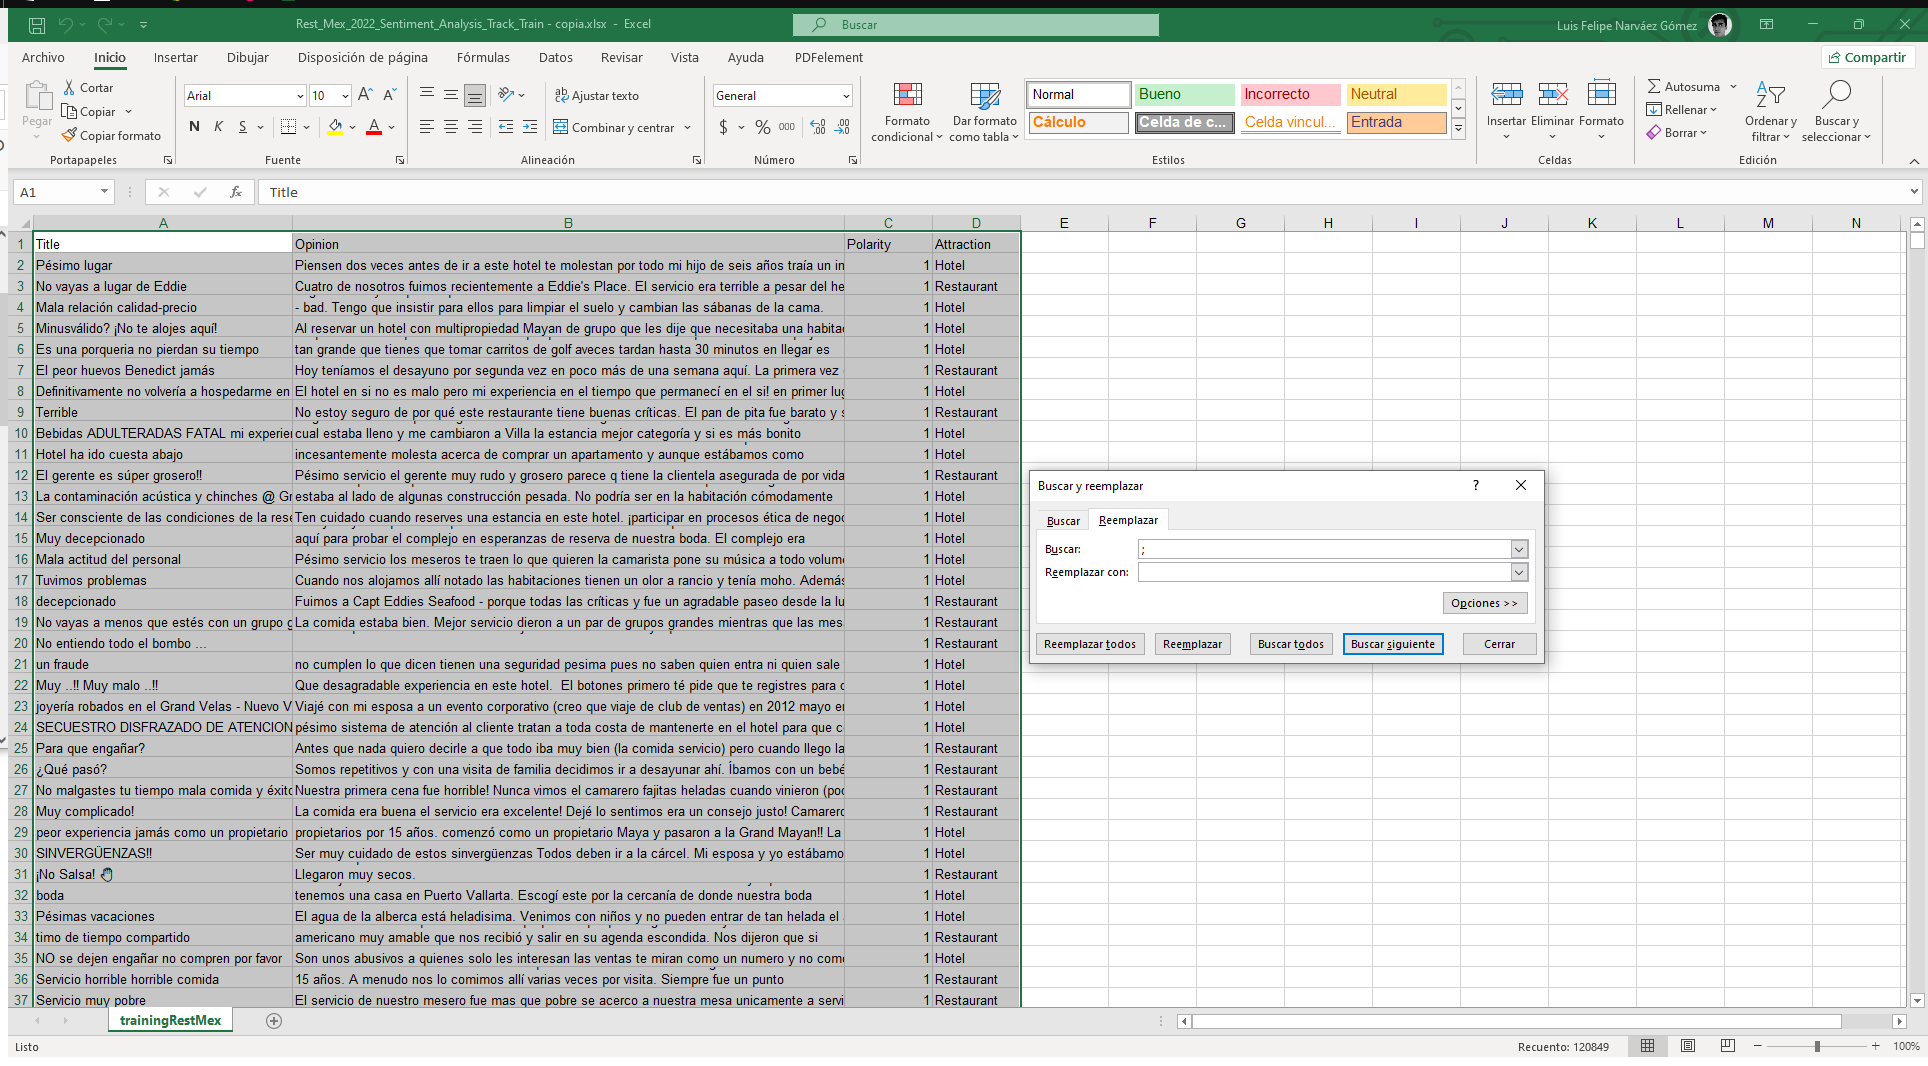

In [3]:
Image("excel.png")

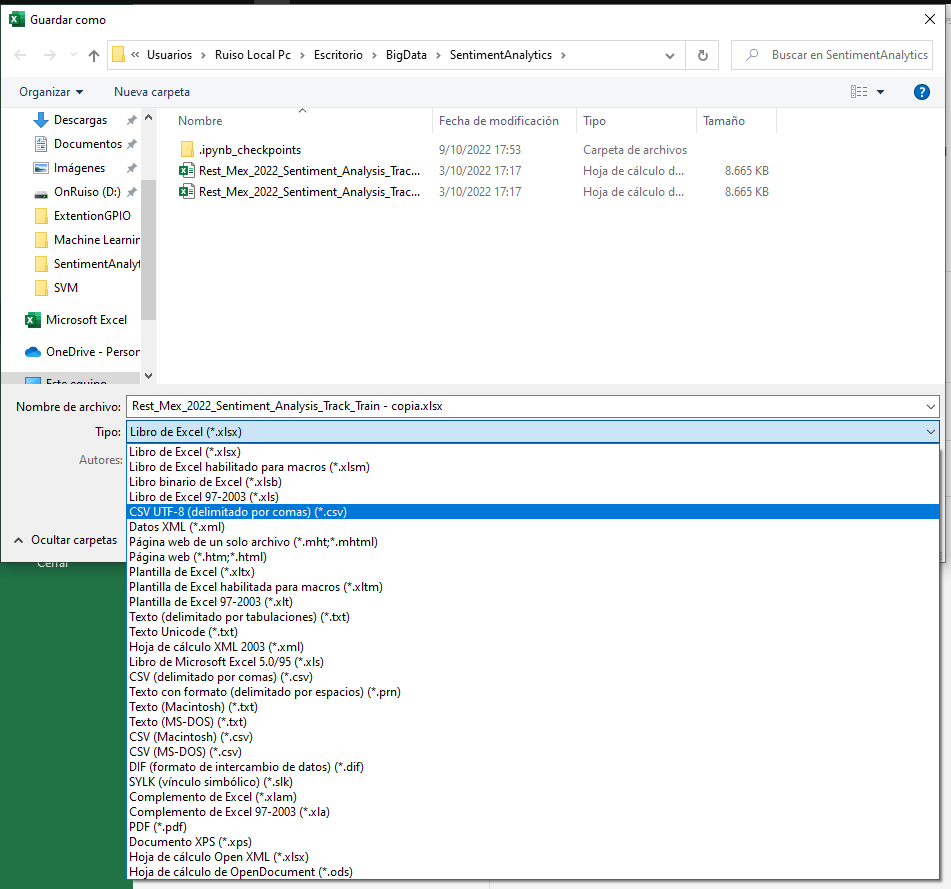

In [4]:
Image("excel2.png")

El archivo CSV realmente delimitado por ";" se reemplazara por delimitaciones de ",".

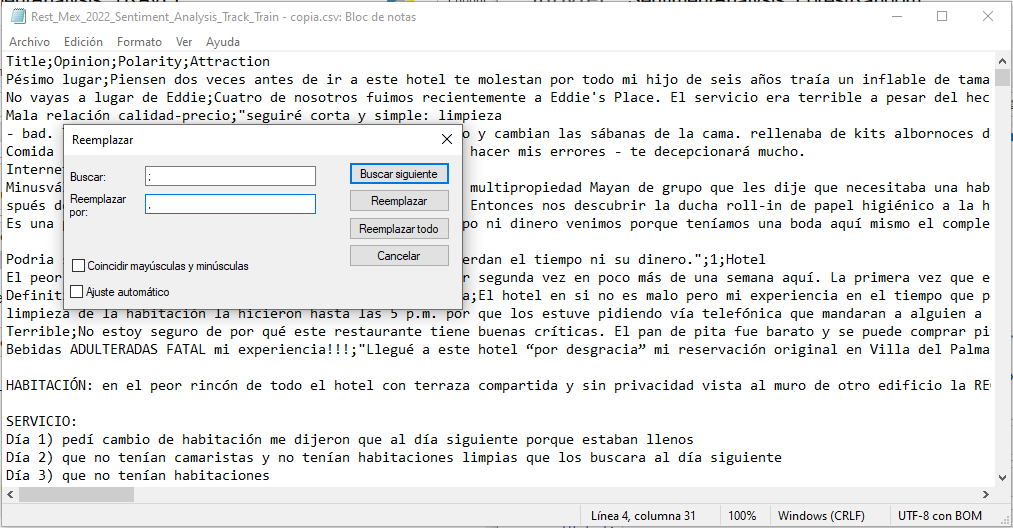

In [5]:
Image("CSV.png")

In [6]:
# Adquirir el archivo
data_source_url = "Rest_Mex_2022_Sentiment_Analysis_Track_Train - copia.csv"

In [9]:
# Leer al archivo
travel_opinions = pd.read_csv(data_source_url, 
                              encoding ='utf-8')
#tambien se podria segun el caso enconding latin-1

In [10]:
# Ahora hechemos un vistazo a nuestra data:
travel_opinions.head(3)

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,Piensen dos veces antes de ir a este hotel te ...,1,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,Hotel


In [11]:
# Conoscamos los valores de las columnas del dataframe.
travel_opinions.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction'], dtype='object')

In [12]:
# ¿tendra algun dato nulo?
travel_opinions.isnull()

,Title,Opinion,Polarity,Attraction
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
30207,False,False,False,False
30208,False,False,False,False
30209,False,False,False,False
30210,False,False,False,False


### Graficos para conocer el Dataset

Como podemos ver en la seccion anterior, este archivo no contiene nulos, por lo que podemos trabajar con él con confianza para la estimacion de los datos.

Ahora bien podemos ver los datos que tenemos de este dataframe en un diagrama de Pastel.

In [13]:
# creemos la figura
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

6.4
4.8


In [14]:
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams ["figure.figsize"] = plot_size

In [16]:
# [0]       [1]         [2]        [3]
# ['Title', 'Opinion', 'Polarity', 'Attraction']

<AxesSubplot:ylabel='Polarity'>

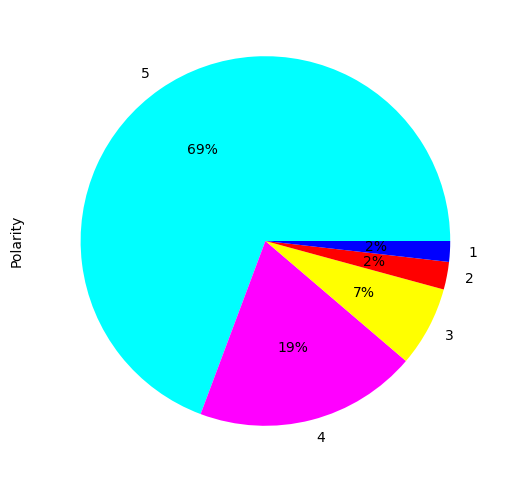

In [15]:
#Grafico de torta ejemplificado la Polaridad
travel_opinions.Polarity.value_counts().plot(kind="pie", 
                                             autopct="%1.0f%%", 
                                             colors=["cyan",
                                                     "magenta",
                                                     "yellow",
                                                     "red",
                                                     "blue"])

<AxesSubplot:ylabel='Attraction'>

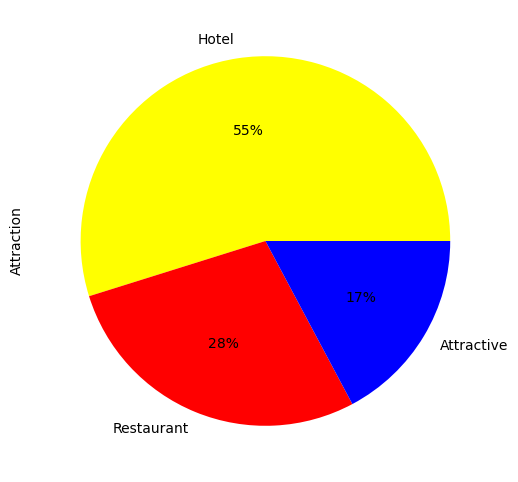

In [17]:
#Grafico de torta ejemplificado la Atraccion
travel_opinions.Attraction.value_counts().plot(kind="pie", 
                                             autopct="%1.0f%%", 
                                             colors=["yellow",
                                                     "red",
                                                     "blue"])

Ahora observemos la proporcion de polaridad de los sentimientos de las personas conforme a el lugar visitado por ellos en un diagrama de barras.

<AxesSubplot:xlabel='Attraction'>

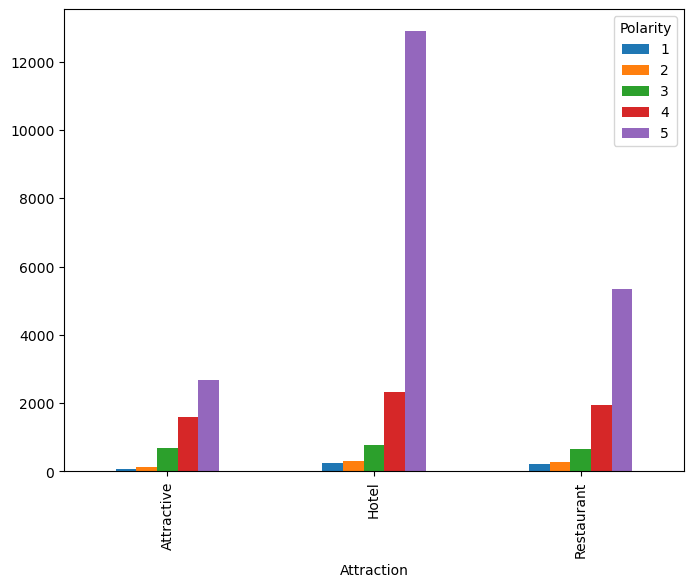

In [19]:
travel_sentiment = travel_opinions.groupby(['Attraction',
                                            'Polarity']).Polarity.count().unstack()
travel_sentiment.plot(kind="bar")

Las posiciones del dataframe son las siguientes:

 [0]       [1]         [2]        [3]

['Title', 'Opinion', 'Polarity', 'Attraction']

Siendo estas posiciones podemos empezar a enfrentar polaridades.

In [20]:
travel_opinions.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction'], dtype='object')

In [21]:
labels  = travel_opinions.iloc[:,2]  # Polaridad
features = travel_opinions.iloc[:,1] # Opiniones

In [22]:
features

0        Piensen dos veces antes de ir a este hotel te ...
1        Cuatro de nosotros fuimos recientemente a Eddi...
2        seguiré corta y simple: limpieza\n- bad. Tengo...
3        Al reservar un hotel con multipropiedad Mayan ...
4        No pierdan su tiempo ni dinero venimos porque ...
                               ...                        
30207    Es una construcción majestuosa creo que de la ...
30208    Muy al estilo de Romeo y Julieta es este sitio...
30209    Ideal para subir las escalinatas y divisar su ...
30210    Es imperdible de ahí puedes ver muy bien la ci...
30211    No te puedes ir de Guanajuato sin visitarlo......
Name: Opinion, Length: 30212, dtype: object

In [23]:
labels

0        1
1        1
2        1
3        1
4        1
        ..
30207    5
30208    5
30209    5
30210    5
30211    5
Name: Polarity, Length: 30212, dtype: int64

In [24]:
# Limpiar el dataset de todos los caracteres especiales.
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    #remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    #substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #removing prefixxed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #converting to lowercase
    processed_feature = processed_feature.lower()
    #añadirlo al arreglo alv
    processed_features.append(processed_feature)

In [25]:
print(processed_features) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
# Descargamos las STOPWORDS
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Ruiso Local
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
vectorizer = TfidfVectorizer (max_features=2500, 
                              min_df = 7, 
                              max_df=0.8, 
                              stop_words=stopwords.words('spanish'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [28]:
print(processed_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# Ahora vamos a crear los vectores para el enetrenamiento y los vectores de pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, 
                                                    labels, 
                                                    test_size = 0.2,
                                                    random_state=0)

In [30]:
# Ahora vamos a entrenar este algoritmo
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, 
                                         random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [31]:
# Veamos que tal hace las predicciones
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = (text_classifier.predict(X_test))

In [32]:
print(confusion_matrix(y_test, predictions))

[[  10    0    2    7   85]
 [   1    5    6   16  117]
 [   1    0   24   42  355]
 [   0    0    5   99 1059]
 [   0    0    3   43 4163]]


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.83      0.10      0.17       104
           2       1.00      0.03      0.07       145
           3       0.60      0.06      0.10       422
           4       0.48      0.09      0.14      1163
           5       0.72      0.99      0.83      4209

    accuracy                           0.71      6043
   macro avg       0.73      0.25      0.26      6043
weighted avg       0.67      0.71      0.62      6043



In [34]:
print(accuracy_score(y_test, predictions))

0.7117325831540625


### Exportar Modelo de Entrenamiento

In [36]:
import pickle
with open('SentimentAnalysis_ForestRandom_OvP','wb') as picklefile:
    pickle.dump(text_classifier, picklefile)

### Importar Modelo de Entrenamiento

In [37]:
with open('SentimentAnalysis_ForestRandom_OvP','rb') as training_model:
    model = pickle.load(training_model)

In [38]:
y_pred2 = model.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[  10    0    2    7   85]
 [   1    5    6   16  117]
 [   1    0   24   42  355]
 [   0    0    5   99 1059]
 [   0    0    3   43 4163]]
              precision    recall  f1-score   support

           1       0.83      0.10      0.17       104
           2       1.00      0.03      0.07       145
           3       0.60      0.06      0.10       422
           4       0.48      0.09      0.14      1163
           5       0.72      0.99      0.83      4209

    accuracy                           0.71      6043
   macro avg       0.73      0.25      0.26      6043
weighted avg       0.67      0.71      0.62      6043

0.7117325831540625
